# Analiza podatkov energetske učinkovitosti

Ponovimo CRISP-DM:
1. Razumevanje problema
2. Razumevanje podatkov
3. Priprava podatkov
4. Modeliranje podatkov
5. Evalvacija modela
6. Uporaba modela

In [40]:
import pandas as pd
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()
df.describe()

,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe
count,5.362800e+04,53628.000000,53628.000000,53616.000000,51580.000000,5.157900e+04,1.726000e+03,2.180100e+04,5.328200e+04,5.330200e+04,53313.000000
mean,1.604654e+07,1537.477325,1237.777430,19.900123,104.775772,2.197961e+04,5.191073e+05,2.609934e+04,5.272743e+04,1.224934e+04,318.287622
std,8.604752e+06,704.922022,1499.701586,62.607765,92.782485,1.083888e+05,3.218912e+06,8.656486e+05,1.391297e+06,3.045606e+05,1367.563206
min,1.012029e+06,1.000000,1.000000,0.000000,-0.020000,-3.010000e+02,-8.105500e+04,-1.665670e+05,-1.859533e+05,-6.972100e+04,1.000000
25%,9.032032e+06,884.000000,271.000000,0.000000,45.827500,2.770000e+02,5.285500e+04,1.000000e+00,4.096250e+02,7.400000e+01,54.000000
50%,1.609203e+07,1727.000000,713.000000,1.000000,76.565000,6.336000e+03,1.487960e+05,1.000000e+00,8.038300e+03,1.696000e+03,83.000000
75%,2.310203e+07,2029.000000,1566.000000,10.000000,135.655000,1.995850e+04,3.731820e+05,2.362000e+01,2.135730e+04,4.547000e+03,171.000000
max,3.112203e+07,2715.000000,10777.000000,1967.000000,3139.320000,1.568572e+07,1.251698e+08,1.227335e+08,3.092701e+08,6.585275e+07,76292.000000


## Razumevanje problema

Kaj sploh je problem?
* Glede na podatke želimo ugotoviti energetsko izkaznico stavbe.
* Prav tako je celotna energija večinsko mankajoči podatek, ki bi ga morda želeli pridobiti.
* Želeli bi vpogled v vpliv različnih odnosov med atributi in kako vplivajo na enegetsko izkaznico ...

In [41]:
df.head(20)

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
0,2025-806-343-120723,17.02.2025,17022035,659,64,14.0,računska,33.00,155.0,NaN,1.0,189.00,37.0,81.0,B2,STANOVANJE
1,2025-808-65-119802,14.02.2025,14022035,2631,2293,0.0,merjena,NaN,NaN,472179.28,162452.0,584378.01,87937.0,2566.0,A1,DRUGO
2,2025-789-337-121007,26.02.2025,26022035,1697,1748,0.0,računska,247.00,354.0,NaN,1.0,481.50,111.0,40.0,G,HISA
3,2025-766-63-121323,09.03.2025,9032035,2315,2295,1.0,računska,98.00,235.0,NaN,1.0,331.80,75.0,84.0,D,HISA
4,2025-796-237-121868,23.03.2025,23032035,533,260,1.0,računska,13.00,40.0,NaN,1.0,74.70,10.0,828.0,A2,PISARNE
5,2025-967-400-120231,03.02.2025,3022035,1301,511,0.0,računska,94.00,155.0,NaN,1.0,185.50,46.0,191.0,D,HISA
6,2025-967-400-120265,04.02.2025,4022035,882,1233,0.0,računska,108.00,146.0,NaN,1.0,255.00,31.0,137.0,E,HISA
7,2025-967-400-120266,04.02.2025,4022035,959,1424,0.0,računska,184.00,225.0,NaN,1.0,282.00,89.0,104.0,F,HISA
8,2025-967-400-120267,04.02.2025,4022035,553,874,0.0,računska,64.00,92.0,NaN,1.0,143.00,14.0,185.0,D,HISA
9,2025-808-65-119803,14.02.2025,14022035,2630,138,0.0,merjena,NaN,NaN,28353.00,15353.0,23029.50,6448.0,270.0,A1,DRUGO


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53628 entries, 0 to 58308
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID energetske izkaznice                53628 non-null  object 
 1   Datum izdelave                         53628 non-null  object 
 2   Velja do                               53628 non-null  int64  
 3   Šifra KO                               53628 non-null  int64  
 4   Številka stavbe                        53628 non-null  int64  
 5   Številka dela stavbe                   53616 non-null  float64
 6   Tip izkaznice                          53628 non-null  object 
 7   Potrebna toplota za ogrevanje          51580 non-null  float64
 8   Dovedena energija za delovanje stavbe  51579 non-null  float64
 9   Celotna energija                       1726 non-null   float64
 10  Dovedena električna energija           21801 non-null  float64
 11  Primarn

## Razumevanje podatkov
* Vidimo lahko, da je `ID_EI` šifra, ki je prepoznana kot objekt (opisni) - unikatna šifra stavbe
* `Datum izdelave` je datum (objekt) (kategorična) - datum izdelave stavbe
* `Velja do` je prav tako datum - do kdaj velja ocena energetske učinkovitosti (10 Let od meritve)
* `Šifra KO` je int (numerična) - šifra katasterskih občin
* `Številka stavbe` tudi int (numerična) - numerična številka stavbe verjetno po šifri KO
* `Številka dela stavbe` je int (numerična) - Globlja klasifikacija od številke stavbe
* `Tip izkaznice` je objekt (opisna) - Na kakšen način je bila pridobljena ocena energetske učinkovitosti
* `Potrebna toplota za ogrevanje` float (numerična)
* `Dovedena energija za delovanje stavbe` je float (numerična) - Ime lepo predstavi spremenljivko
* `Celotna energija` je opisana kot float (numerična) - energija celokupno
* `Dovedena električna energija` je opisana kot float (numerična) - samo električna energija
* `Primarna energija` je opisana kot float (numerična) - primarni energijski vir v kWh/m**2a
* `Emisije CO2` je opisana kot float (numerična) - koliko emisij izpust v enoti kg/m**2a
* `Kondicionirana površina stavbe` je float (numerična) - predstavlja neto površino stavbe, ki je ogrevana (m**2)
* `Energijski razred` je opisan kot objekt, gre za string iz nekega slovarja (kategorična) - kako dobro je ohranjanje toplote (A predstavlja najboljši razred -> po abecednem redu na slebše)
* `EPBD` (Energy performance of buildings directive) je opisana kot objekt, gre za string (opisna) - Opis prostora npr. hiša, stanovanje -> opisuje kategorijo ...

<Axes: xlabel='Energijsi razred', ylabel='število zapisov'>

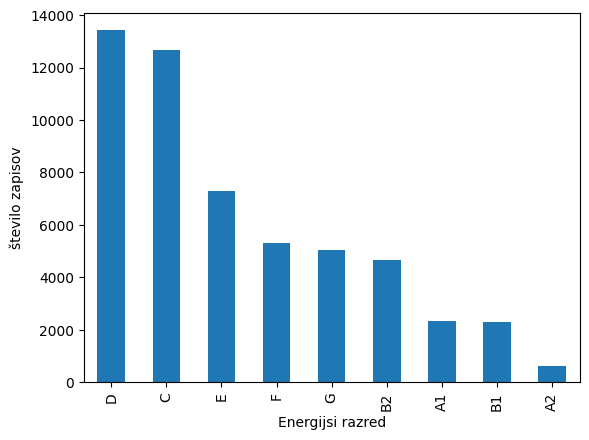

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
df["Energijski razred"].dropna().value_counts().plot(kind="bar", xlabel="Energijsi razred", ylabel="število zapisov")

In [44]:
df.dropna(subset=["Celotna energija"], inplace=True)
df = df.fillna(0)

In [45]:
df

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
1,2025-808-65-119802,14.02.2025,14022035,2631,2293,0.0,merjena,0.0,0.0,472179.28,162452.0,584378.01,87937.0,2566.0,A1,DRUGO
9,2025-808-65-119803,14.02.2025,14022035,2630,138,0.0,merjena,0.0,0.0,28353.00,15353.0,23029.50,6448.0,270.0,A1,DRUGO
19,2025-983-194-120786,19.02.2025,19022035,1077,1611,0.0,merjena,0.0,0.0,178467.08,40821.0,212642.19,55238.0,1363.0,A1,PISARNE
20,2025-983-194-120789,19.02.2025,19022035,1074,2016,0.0,merjena,0.0,0.0,173281.00,45481.0,208801.50,44662.0,840.0,A1,PISARNE
114,2024-866-17-119385,31.12.2024,31122034,2636,7755,0.0,merjena,0.0,0.0,2146741.00,1299391.0,3050641.50,766055.0,12241.0,A1,PISARNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58069,2024-861-9-112877,26.04.2024,26042034,680,4,22.0,merjena,0.0,0.0,644099.00,467736.0,895603.30,231722.0,2401.0,A1,PRODAJA
58086,2024-886-61-113276,13.05.2024,13052034,799,20,0.0,merjena,0.0,0.0,60399.08,2876.0,67589.39,17890.0,216.0,A1,DRUGO
58161,2024-861-9-112935,06.05.2024,6052034,659,4528,0.0,merjena,0.0,0.0,1074479.00,729165.0,669011.28,250999.0,6929.0,A1,PRODAJA
58183,2024-861-9-114135,14.06.2024,14062034,2605,2062,0.0,merjena,0.0,0.0,1355185.40,1086530.0,1202378.58,332368.0,6372.0,A1,PRODAJA


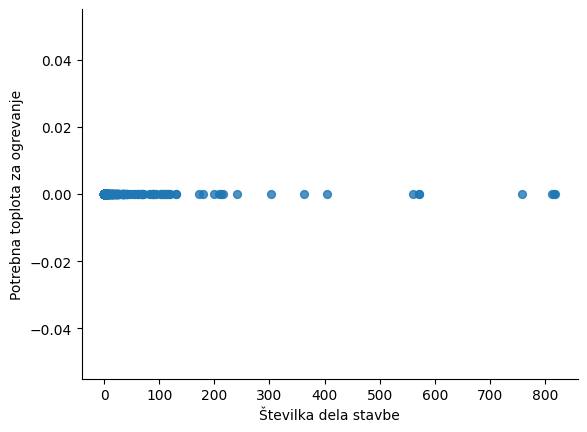

In [46]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Številka dela stavbe', y='Potrebna toplota za ogrevanje', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Ni primerna za strojno učenje**

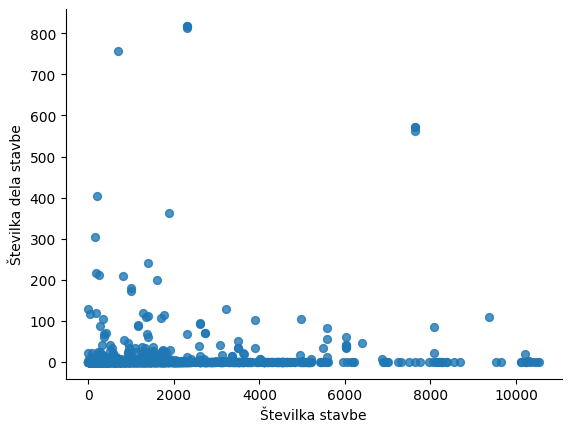

In [47]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Številka stavbe', y='Številka dela stavbe', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Glede na to, da opisuje stavo. Ugibamo, da ni nobene odvisnosti med številko stavbe in celotno energijo**

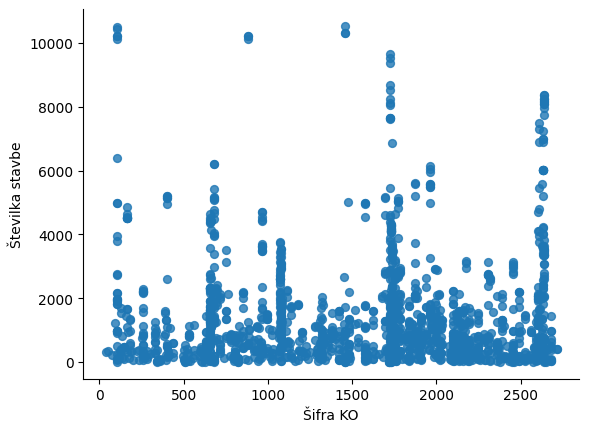

In [48]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Šifra KO', y='Številka stavbe', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Podobno kot prejšnja**

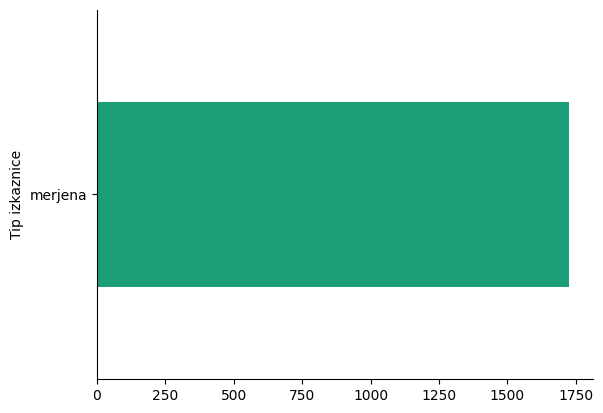

In [49]:
df.groupby('Tip izkaznice').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Prej sta bili dve. Ena sama nima vpliva na ML model**

**Energijski razred neuporaben, ker so vsi isti(A1) -> Tudi zelo slaba distribucija podatkov za ML model. Bomo videli, kaj nam uspe narediti.**

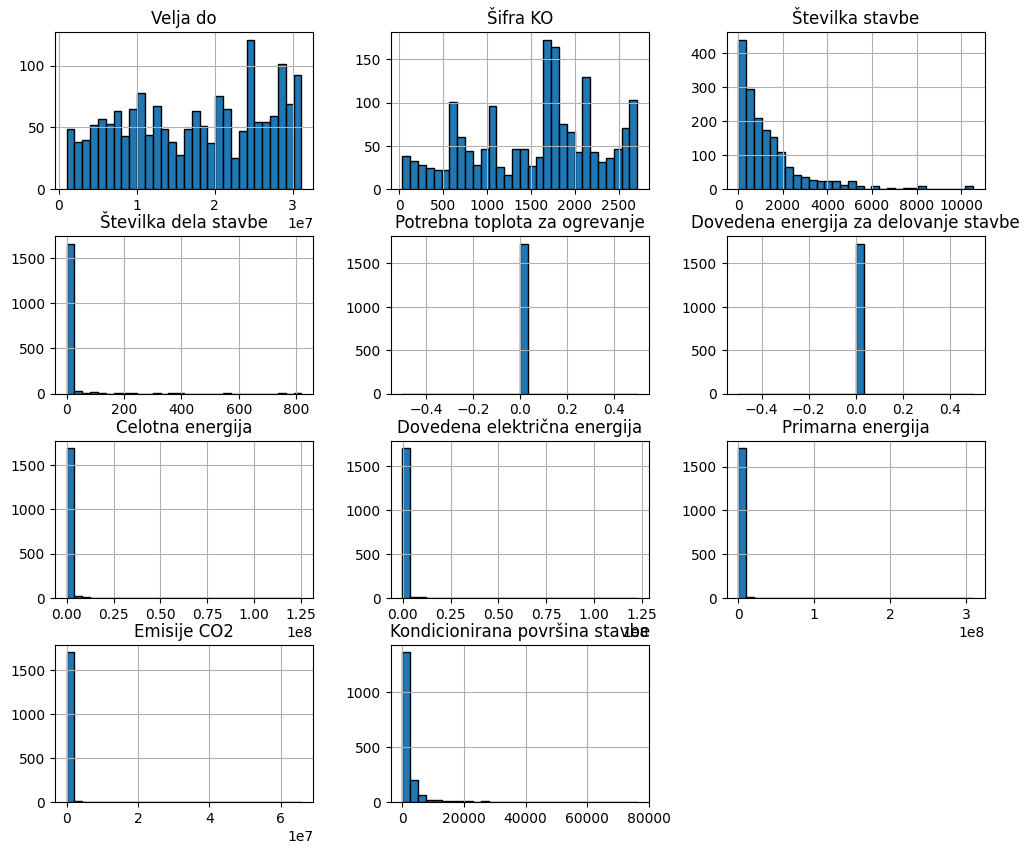

In [50]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black");

**Podatki zelo neuravnoteženi ...**

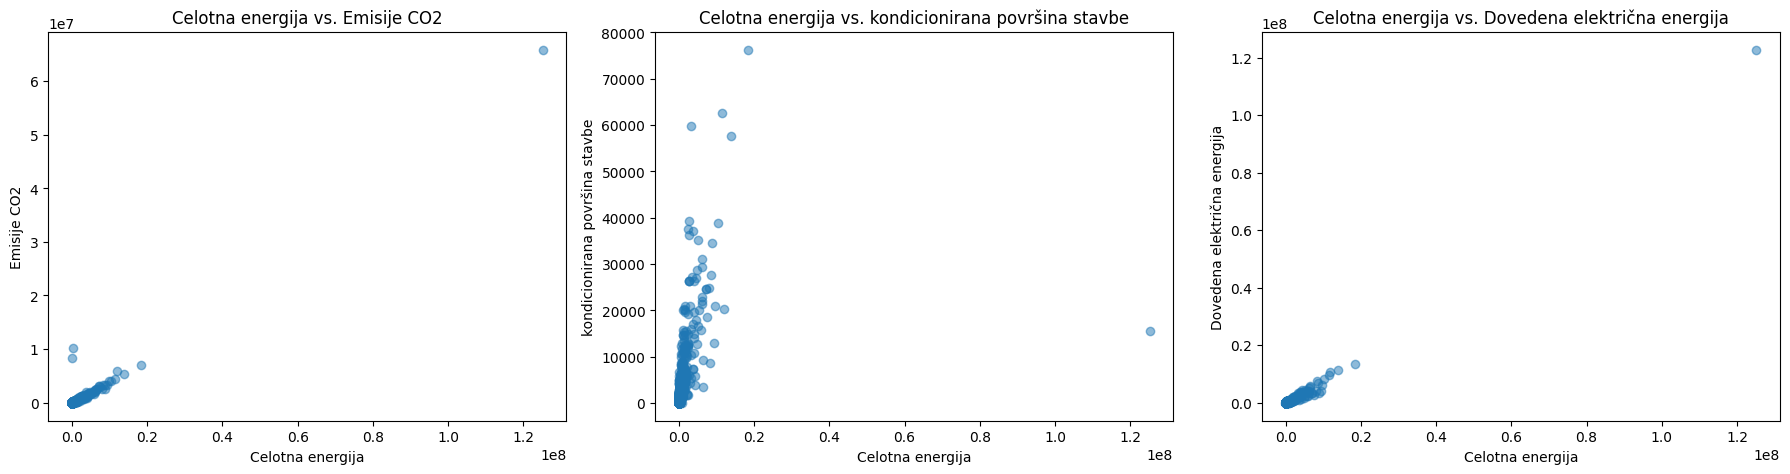

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Celotna energija vs. Emisije CO2
axes[0].scatter(df["Celotna energija"], df["Emisije CO2"], alpha=0.5)
axes[0].set_xlabel("Celotna energija")
axes[0].set_ylabel("Emisije CO2")
axes[0].set_title("Celotna energija vs. Emisije CO2")

# 2. Celotna energija vs. kondicionirana površina stavbe
axes[1].scatter(df["Celotna energija"], df["Kondicionirana površina stavbe"], alpha=0.5)
axes[1].set_xlabel("Celotna energija")
axes[1].set_ylabel("kondicionirana površina stavbe")
axes[1].set_title("Celotna energija vs. kondicionirana površina stavbe")

# 3. Dovedena električna energija vs. Emisije CO2
axes[2].scatter(df["Celotna energija"], df["Dovedena električna energija"], alpha=0.5)
axes[2].set_xlabel("Celotna energija")
axes[2].set_ylabel("Dovedena električna energija")
axes[2].set_title("Celotna energija vs. Dovedena električna energija")

plt.tight_layout()  # Lepše razporedi grafe in oznake
plt.show()

**Na zgornjih grafih vidimo neko linearno odvisnost, ki bi jo lahko uporabili s pomočjo linearne regresije -> Ne vemo, kako dobro bomo napovedali celotno energijo za druge energijske razrede. Seveda, bi bilo dobro vedeti, koliko od teh je dejansko NaN na prvotnem podatkovnem setu**

*Če pogledamo nazaj je vseh zapisov razen celotne energije več kot 50k

## Modeliranje - Ustvarjajne modela

* Poiskali bomo najboljši model (najboljši R2)
* Najbolj smiselno uporabiti odvisne atribute (poglejmo corr matrix)
* Optimizirali model na podlagi evalvacije modela
* Poizkusili nadomestiti manjakajoče podatke

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
import pickle

In [134]:
import pandas as pd
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()

In [135]:
def urediPodatkeRegresija(df):
  df.drop(columns=["Tip izkaznice", "ID energetske izkaznice", "Velja do", "Šifra KO", "Številka stavbe", "Številka dela stavbe", "Potrebna toplota za ogrevanje", "Dovedena energija za delovanje stavbe", "Energijski razred", "EPBD ", "Datum izdelave"], inplace=True)
  df.dropna(subset=["Celotna energija"], inplace=True)
  df = df.fillna(0);
  target = df["Celotna energija"]
  df.drop(columns=["Celotna energija"], inplace=True)
  df = df[df["Dovedena električna energija"] != 1]
  df = (df - df.min()) / (df.max() - df.min())

  return df, target

In [136]:
X, y = urediPodatkeRegresija(df)

In [137]:
X

,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe
1,0.002677,0.002489,0.002392,0.033533
9,0.001480,0.000675,0.001155,0.003435
19,0.001687,0.001288,0.001896,0.017763
20,0.001725,0.001276,0.001735,0.010907
114,0.011928,0.010459,0.012678,0.160361
...,...,...,...,...
58069,0.005161,0.003495,0.004573,0.031370
58086,0.001379,0.000819,0.001329,0.002727
58161,0.007288,0.002763,0.004865,0.090727
58183,0.010196,0.004486,0.006099,0.083425


In [138]:
y

,Celotna energija
1,472179.28
9,28353.00
19,178467.08
20,173281.00
114,2146741.00
...,...
58069,644099.00
58086,60399.08
58161,1074479.00
58183,1355185.40


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
def evaluate_models():
    # Definiraj modele
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42)
    }

    # Rezultati
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        results[name] = {
            "R2": r2_score(y_test, predictions),
            "MAE": mean_absolute_error(y_test, predictions),
            "RMSE": np.sqrt(mean_squared_error(y_test, predictions))
        }

    return results

In [141]:
results = evaluate_models()
print("LinearRegression: ", results["LinearRegression"] , "\n", "RandomForest: ", results["RandomForest"], "\n", "GradientBoosting: ", results["GradientBoosting"], "\n")

LinearRegression:  {'R2': 0.8214141057279273, 'MAE': 178922.8095100429, 'RMSE': np.float64(2391697.0431256457)} 
 RandomForest:  {'R2': 0.1999184184026216, 'MAE': 298477.2956088803, 'RMSE': np.float64(5062321.540976646)} 
 GradientBoosting:  {'R2': 0.1983292668518789, 'MAE': 299055.6888816818, 'RMSE': np.float64(5067346.531900541)} 



<ipython-input-142-8508c8bf5419>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


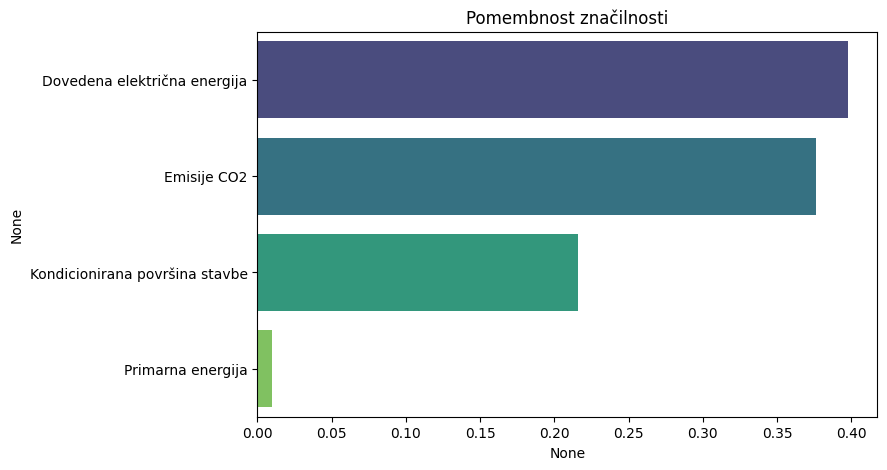

In [142]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
features = ["Dovedena električna energija", "Emisije CO2", "Kondicionirana površina stavbe", "Primarna energija"]
feature_importances = pd.Series(regr.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Pomembnost značilnosti")
plt.show()

**KOt ugibali lahko odstranimo tudi primarno energijo**

In [143]:
import pandas as pd
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()

In [145]:
def urediPodatkeRegresija(df):
  df.drop(columns=["Tip izkaznice", "ID energetske izkaznice", "Velja do", "Šifra KO", "Številka stavbe", "Številka dela stavbe", "Potrebna toplota za ogrevanje", "Dovedena energija za delovanje stavbe", "Energijski razred", "EPBD ", "Datum izdelave", "Primarna energija"], inplace=True)
  df.dropna(subset=["Celotna energija"], inplace=True)
  df = df.fillna(0);
  target = df["Celotna energija"]
  df.drop(columns=["Celotna energija"], inplace=True)
  df = df[df["Dovedena električna energija"] != 1]
  df = (df - df.min()) / (df.max() - df.min())

  return df, target

In [146]:
X, y = urediPodatkeRegresija(df)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
#poskusimo ponovno
results = evaluate_models()
print("LinearRegression: ", results["LinearRegression"] , "\n", "RandomForest: ", results["RandomForest"], "\n", "GradientBoosting: ", results["GradientBoosting"], "\n")

LinearRegression:  {'R2': 0.9748081972629425, 'MAE': 157256.1362966159, 'RMSE': np.float64(898280.9996776641)} 
 RandomForest:  {'R2': 0.19878629344547027, 'MAE': 308620.0540992278, 'RMSE': np.float64(5065901.897468044)} 
 GradientBoosting:  {'R2': 0.19587603016795185, 'MAE': 309251.49072121526, 'RMSE': np.float64(5075094.042137399)} 



Linearna regresija ima sedaj R2 97,4%

In [149]:
# poskusimo napovedati vse vrednosti podatkovnega seta, kjer naše spremenljivke niso NaN (atributi)
lr_grid = {
    'fit_intercept': [True, False]
    # Note: LinearRegression has very few parameters to tune.
}

model = LinearRegression()

lr_sh = RandomizedSearchCV(model, param_distributions=lr_grid,
                                   n_iter=2, cv=5, random_state=42)

lr_sh.fit(X_train, y_train)
print(lr_sh.best_params_)

predictions = lr_sh.predict(X_test)

print("R2: ", r2_score(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE: ", mean_absolute_error(y_test, predictions))

{'fit_intercept': False}
R2:  0.992892506884017
RMSE:  477134.49336620845
MAE:  214115.05373180978


Ob optimizaciji hiperparametra smo dobili 99% pojasnjene variance

In [150]:
# Shranimo model
filename = '/content/sample_data/LRCelotnaEnergija.pkl'
pickle.dump(lr_sh, open(filename, 'wb'))

## Uporaba modela

In [151]:
## Urejanje podatkov za napoved na df

def pripravaZaNapoved(df):
  df = df.drop_duplicates()
  df.dropna(subset=["Dovedena električna energija", "Emisije CO2", "Kondicionirana površina stavbe"], inplace=True)

  return df


def pripravaZaNapoved1(df):
  df.drop(columns=["Tip izkaznice", "ID energetske izkaznice", "Velja do", "Šifra KO", "Številka stavbe", "Številka dela stavbe", "Potrebna toplota za ogrevanje", "Dovedena energija za delovanje stavbe", "Energijski razred", "EPBD ", "Datum izdelave", "Primarna energija"], inplace=True)
  df.drop(columns=["Celotna energija"], inplace=True)
  df.fillna(0, inplace=True)
  df = (df - df.min()) / (df.max() - df.min())

  return df

In [152]:
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = pripravaZaNapoved(df)
df1 = df.copy()
target = df["Celotna energija"]
df_napoved = pripravaZaNapoved1(df1)

<ipython-input-151-532cf9e9c7bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["Dovedena električna energija", "Emisije CO2", "Kondicionirana površina stavbe"], inplace=True)


In [153]:
pred = lr_sh.predict(df_napoved)
pred

array([177415.41672606, 459442.55709229, 175664.86244426, ...,
       176730.32933571, 186690.6739507 , 216588.98338287])

In [154]:
target.fillna(0, inplace=True)
mask = (target == 0)
target[mask] = np.abs(pred[mask])
target = target.abs()
target

<ipython-input-154-400f8859408d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[mask] = np.abs(pred[mask])


,Celotna energija
0,177415.416726
1,472179.280000
2,175664.862444
3,177554.220539
4,209635.737016
...,...
58304,180042.382267
58305,180231.731782
58306,176730.329336
58307,186690.673951


In [155]:
df["Celotna energija"] = target

In [156]:
df

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
0,2025-806-343-120723,17.02.2025,17022035,659,64,14.0,računska,33.00,155.0,177415.416726,1.0,189.00,37.0,81.0,B2,STANOVANJE
1,2025-808-65-119802,14.02.2025,14022035,2631,2293,0.0,merjena,NaN,NaN,472179.280000,162452.0,584378.01,87937.0,2566.0,A1,DRUGO
2,2025-789-337-121007,26.02.2025,26022035,1697,1748,0.0,računska,247.00,354.0,175664.862444,1.0,481.50,111.0,40.0,G,HISA
3,2025-766-63-121323,09.03.2025,9032035,2315,2295,1.0,računska,98.00,235.0,177554.220539,1.0,331.80,75.0,84.0,D,HISA
4,2025-796-237-121868,23.03.2025,23032035,533,260,1.0,računska,13.00,40.0,209635.737016,1.0,74.70,10.0,828.0,A2,PISARNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58304,2024-827-121-114489,22.06.2024,22062034,1447,869,0.0,računska,153.39,257.0,180042.382267,1.0,100.10,18.0,142.0,F,HISA
58305,2024-927-316-114499,23.06.2024,23062034,1331,895,0.0,računska,230.99,281.0,180231.731782,1.0,353.10,86.0,146.0,G,HISA
58306,2024-927-316-114523,25.06.2024,25062034,1075,820,0.0,računska,88.68,196.0,176730.329336,1.0,231.00,58.0,65.0,D,HISA
58307,2024-897-8-114350,27.06.2024,27062034,2108,50,0.0,računska,87.59,123.0,186690.673951,1.0,172.90,36.0,296.0,D,HISA


In [157]:
## Dovedena električna enegrija 1.0 mora biti napaka zato bomo izbrisali vse
df = df[df["Dovedena električna energija"] != 1]

In [158]:
df

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
1,2025-808-65-119802,14.02.2025,14022035,2631,2293,0.0,merjena,NaN,NaN,472179.28,162452.0,584378.01,87937.0,2566.0,A1,DRUGO
9,2025-808-65-119803,14.02.2025,14022035,2630,138,0.0,merjena,NaN,NaN,28353.00,15353.0,23029.50,6448.0,270.0,A1,DRUGO
19,2025-983-194-120786,19.02.2025,19022035,1077,1611,0.0,merjena,NaN,NaN,178467.08,40821.0,212642.19,55238.0,1363.0,A1,PISARNE
20,2025-983-194-120789,19.02.2025,19022035,1074,2016,0.0,merjena,NaN,NaN,173281.00,45481.0,208801.50,44662.0,840.0,A1,PISARNE
114,2024-866-17-119385,31.12.2024,31122034,2636,7755,0.0,merjena,NaN,NaN,2146741.00,1299391.0,3050641.50,766055.0,12241.0,A1,PISARNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58069,2024-861-9-112877,26.04.2024,26042034,680,4,22.0,merjena,NaN,NaN,644099.00,467736.0,895603.30,231722.0,2401.0,A1,PRODAJA
58086,2024-886-61-113276,13.05.2024,13052034,799,20,0.0,merjena,NaN,NaN,60399.08,2876.0,67589.39,17890.0,216.0,A1,DRUGO
58161,2024-861-9-112935,06.05.2024,6052034,659,4528,0.0,merjena,NaN,NaN,1074479.00,729165.0,669011.28,250999.0,6929.0,A1,PRODAJA
58183,2024-861-9-114135,14.06.2024,14062034,2605,2062,0.0,merjena,NaN,NaN,1355185.40,1086530.0,1202378.58,332368.0,6372.0,A1,PRODAJA


In [159]:
## Shranimo še podatke za pomoč pri klasifikaciji
df.to_csv("ER_podatki_napovedana_CE.csv")

<Axes: xlabel='Energijsi razred', ylabel='število zapisov'>

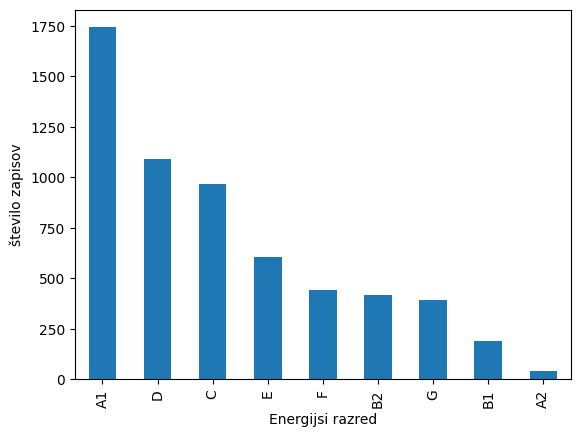

In [160]:
df["Energijski razred"].dropna().value_counts().plot(kind="bar", xlabel="Energijsi razred", ylabel="število zapisov")

* Sicer smo izgubili nekaj vrednosti, vendar ostajajo vse kategorije za energetski razred. Porazdelitev podobna kot pri original podatkih (le vrstni red ER zamenjan)